# Deep Q-Network
- import DQN
- create network with 1 layer
- test capability of training (2, 10, 2)
- Train qvalues with the network for the SDI

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as jrandom

from src.NeuralNetwork.ANN import NeuralNet
from src.RL.DQLearning import DQLearning
from src.systems.linear import StochasticDoubleIntegrator
from src.controllers.utilities import *

## Neural Network

In [5]:
key = jrandom.PRNGKey(0)
architecture = (1, 1)
activation = ['linear']

NN = NeuralNet(key, architecture, activation)

In [13]:
n_input = 1
n_samples = 500

def f(x):
    return 2*x

x_train = jrandom.normal(key, (n_samples, n_input))
x_test = jnp.linspace(-1, 1, 20)
y_train = f(x_train) + jrandom.normal(key, (n_samples, n_input))
y_test_true = f(x_test)

NN.train_batch(x_train, y_train)
y_test_prediction = NN.predict_batch(x_test)


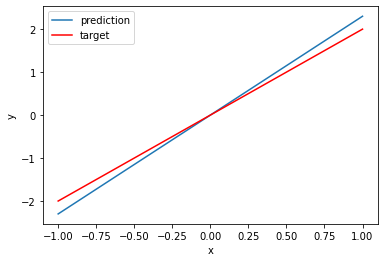

In [14]:
fig, ax = plt.subplots()
ax.plot(x_test, y_test_prediction, label='prediction')
ax.plot(x_test, y_test_true, color='r', label='target')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

## Initiate the Q-learning problem

(2000,)


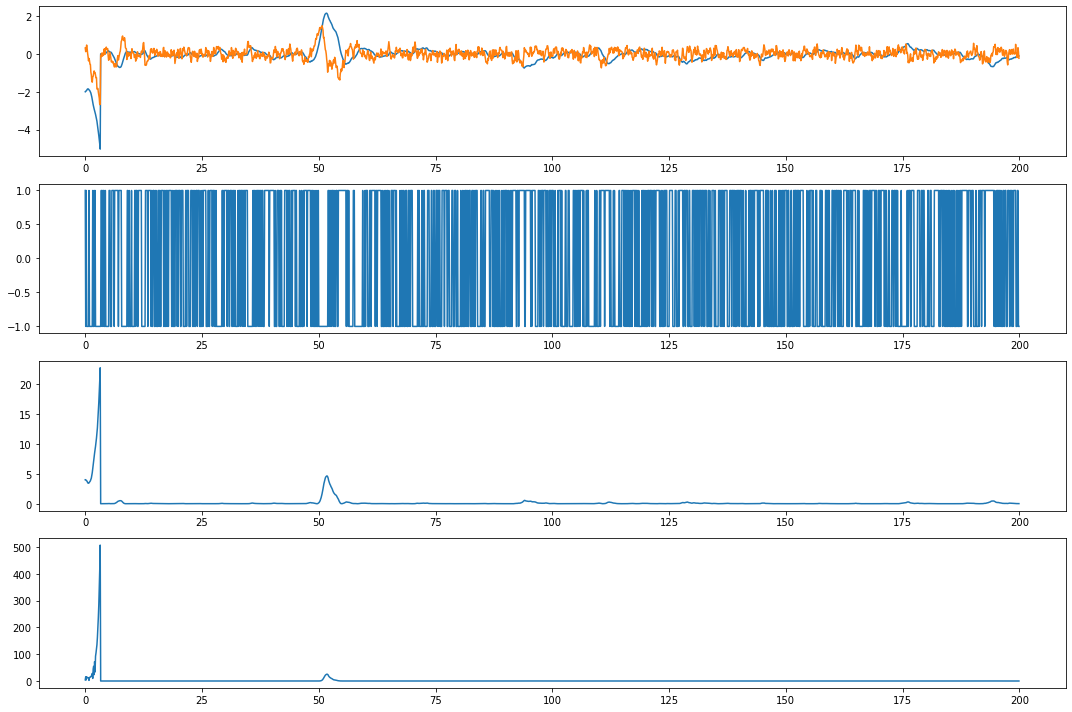

In [15]:

key = jrandom.PRNGKey(1)

# Initialize system
x0 = np.array([-2, 0])
SDI = StochasticDoubleIntegrator(x0)

# Initialize neural network
architecture = (2, 2)
activation = ['linear']
NN = NeuralNet(key, architecture, activation, eta=1e-4)

# Choose controler
DQL = DQLearning(NN, SDI.dim)

# Train controler
th, X, U, C, L, DQL = run_controlled_environment(key, DQL, SDI, 200, learning=True, training_wheels=True)
print(U.shape)

fig, ax = plt.subplots(4, figsize=(15,10))
ax[0].plot(th, X[:, 0])
ax[0].plot(th, X[:, -1])
ax[1].plot(th, U)
ax[2].plot(th, C)
ax[3].plot(th, L)
plt.tight_layout()



### Test

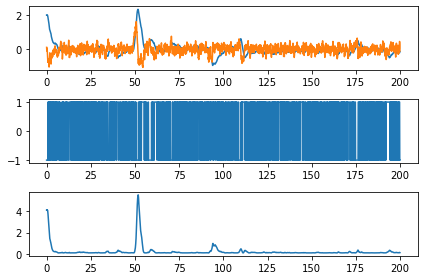

In [16]:
# Initialize system
x0 = np.array([2, 0])
SDI = StochasticDoubleIntegrator(x0)

# Run controler
th, X, U, C, _, DQL = run_controlled_environment(key, DQL, SDI, 200, learning=False)

fig, ax = plt.subplots(3)
ax[0].plot(th, X[:, 0])
ax[0].plot(th, X[:, -1])
ax[1].plot(th, U)
ax[2].plot(th, C)
plt.tight_layout()

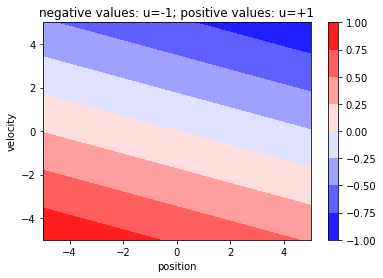

In [17]:
from matplotlib import cm

n=10
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
xv, yv = np.meshgrid(x,y)
z = np.zeros((2, n, n))
for i in range(n):
    for j in range(n):
        #qvals = DQL.get_qval(jnp.array([xv[i,j], yv[i,j]]))
        qvals = DQL.get_qval(jnp.array([xv[i,j], yv[i,j]]))
        z[0,i,j] = qvals[0]
        z[1,i,j] = qvals[1]

plt.contourf(xv, yv, z[1] - z[0], cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('negative values: u=-1; positive values: u=+1');